## Update Showcase Chart

In [5]:
import yfinance as yf

from pathlib import Path

from mplchart.chart import Chart

from mplchart.primitives import Candlesticks, Volume, TradeMarker, TradeSpan
from mplchart.indicators import SMA, EMA, RSI, MACD

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

root = Path.cwd().parent

In [6]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-02-26 00:00:00-05:00,41.807600,42.190272,41.677634,41.956818,68280800,0.0,0.0
2019-02-27 00:00:00-05:00,41.687275,42.118081,41.571748,42.086792,111341600,0.0,0.0
2019-02-28 00:00:00-05:00,41.954414,42.096411,41.617467,41.672821,112861600,0.0,0.0
2019-03-01 00:00:00-05:00,41.944793,42.154179,41.610255,42.110859,103544800,0.0,0.0
2019-03-04 00:00:00-05:00,42.284138,42.779928,41.870177,42.322647,109744800,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-20 00:00:00-05:00,181.789993,182.429993,180.000000,181.559998,53665600,0.0,0.0
2024-02-21 00:00:00-05:00,181.940002,182.889999,180.660004,182.320007,41529700,0.0,0.0
2024-02-22 00:00:00-05:00,183.479996,184.960007,182.460007,184.369995,52292200,0.0,0.0


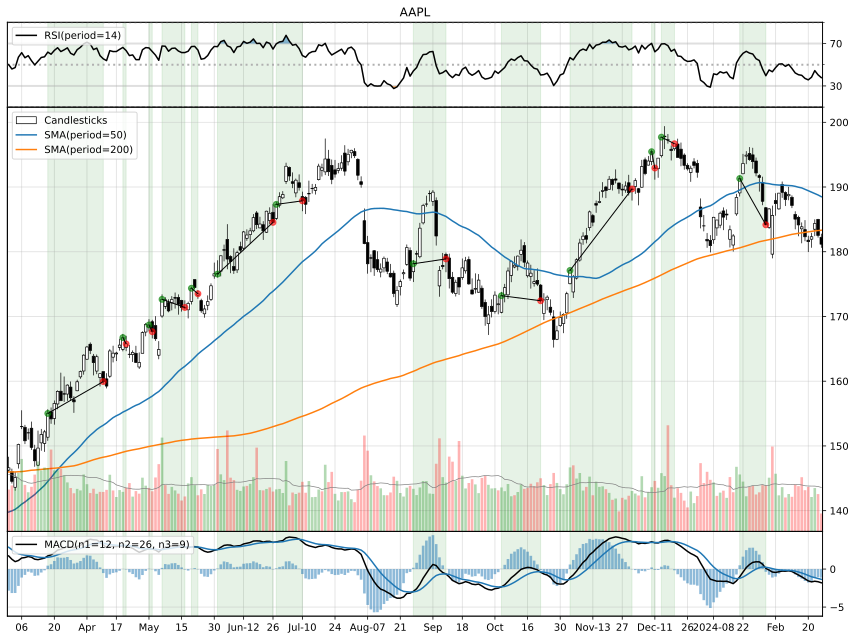

In [7]:
max_bars = 250

indicators = [
    Candlesticks(use_bars=False),
    SMA(50),
    SMA(200),
    Volume(),
    RSI(),
    MACD(),
    TradeMarker(),
    TradeSpan(),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

In [8]:
showcase = root.joinpath("output/showcase.svg")

data = chart.render("svg")

print(f"Updating {showcase.name} ...")

showcase.write_bytes(data)

Updating showcase.svg ...


299911